In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import joblib

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Fraud_Detection.csv')

In [10]:
df.shape

(636262, 10)

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636251 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636261 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636252 non-null  float64
 9   isFraud         636262 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 48.5+ MB


In [16]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [81]:
col_names = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
for col in col_names:
    
    print(df[col].value_counts())   

step
19     5206
187    5039
18     4926
235    4652
163    4626
       ... 
56        1
414       1
224       1
510       1
319       1
Name: count, Length: 630, dtype: int64
type
CASH_OUT    224212
PAYMENT     214965
CASH_IN     139611
TRANSFER     53293
DEBIT         4170
Name: count, dtype: int64
amount
10000000.00    314
15000.00        10
10000.00         9
500.00           7
120000.00        5
              ... 
10131.75         1
21585.69         1
159165.52        1
313805.89        1
95142.89         1
Name: count, Length: 622491, dtype: int64
nameOrig
C1170419019    2
C1808443159    2
C1221138730    2
C1270944708    2
C307497965     2
              ..
C108450314     1
C728297195     1
C1462750500    1
C1669561304    1
C874575079     1
Name: count, Length: 636160, dtype: int64
oldbalanceOrg
0.00          210267
164.00           111
137.00           104
157.00           103
198.00            99
               ...  
1199384.74         1
2743804.70         1
9141551.14         1

In [20]:
df.isnull().sum()

step               0
type              11
amount             0
nameOrig           0
oldbalanceOrg      1
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest    10
isFraud            0
dtype: int64

# Handaling Null Values

### For features newbalanceDest

In [24]:
df['newbalanceDest'].value_counts()

newbalanceDest
0.00          243934
4692432.30         5
641979.14          5
971418.91          5
4416613.81         5
               ...  
532509.32          1
3481910.06         1
1456608.43         1
654158.77          1
526522.96          1
Name: count, Length: 387354, dtype: int64

In [26]:
df['newbalanceDest'].fillna(df['newbalanceDest'].mode()[0], inplace=True)

In [28]:
df['newbalanceDest'].isnull().sum()

0

### For features oldbalanceOrg

In [31]:
df['oldbalanceOrg'].value_counts()

oldbalanceOrg
0.00          210268
164.00           111
137.00           104
157.00           103
115.00            99
               ...  
81368.65           1
342837.00          1
1243597.88         1
1199384.74         1
83669.00           1
Name: count, Length: 258156, dtype: int64

In [33]:
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mode()[0], inplace=True)

In [35]:
df['oldbalanceOrg'].isnull().sum()

0

### For feature type

In [38]:
null_rows = df[df['type'].isnull()]
null_rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
151,307,NaN,342616.22,C1755798883,77195.00,0.00,C166847480,52234.79,394851.02,0
302,158,NaN,7732.21,C1234527342,1342324.35,1350056.56,C1377667801,1824833.18,1817100.97,0
585,16,NaN,112729.09,C1364384249,17605333.90,17718062.98,C1360951522,435841.14,323112.06,0
586,358,NaN,27110.80,C425055824,1418.00,0.00,M212550022,0.00,0.00,0
587,158,NaN,1472.69,C1577593539,0.00,0.00,M1478160182,0.00,0.00,0
588,258,NaN,172742.22,C488703547,29902.00,0.00,C1217210790,0.00,172742.22,0
589,252,NaN,269887.00,C1109038861,51581.00,0.00,C492589157,0.00,269887.00,0
590,179,NaN,237127.22,C1902249193,0.00,0.00,C1294113408,1339533.70,1941840.53,0
591,334,NaN,85152.95,C275461737,9052573.26,9137726.22,C860780151,831650.75,746497.80,0
592,179,NaN,754.21,C814909892,30499.00,29744.79,M1164217842,0.00,0.00,0


In [40]:
df['isFraud'].value_counts()

isFraud
0    635441
1       821
Name: count, dtype: int64

#### Basen on above informaiton the class is highly imbalanced with 635,441legitimate transactions and only 821 fraudulent transactions, so we can drop the row which contain null value in type

In [43]:
df = df.dropna(subset=['type'])
df.reset_index(drop=True, inplace=True)

In [45]:
df['type'].isnull().sum()

0

### Data Visualization

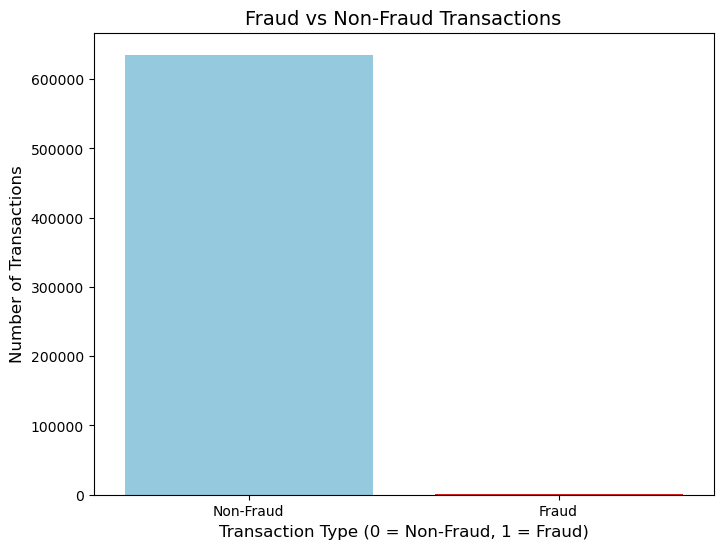

In [61]:
fraud_counts = df['isFraud'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['skyblue', 'red'])

plt.title('Fraud vs Non-Fraud Transactions', fontsize=14)
plt.xlabel('Transaction Type (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [71]:
legitimate = df[df['isFraud'] == 0]
fraudulent = df[df['isFraud'] == 1]
# len(fraudulent)
legitimate_downsampled = legitimate.sample(len(fraudulent))
balanced_data = pd.concat([legitimate_downsampled, fraudulent])


In [75]:
legitimate_downsampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
343948,139,PAYMENT,2106.32,C1376147275,45180.98,43074.67,M684681727,0.00,0.00,0
621560,400,CASH_OUT,220983.82,C1955459933,21689.00,0.00,C1362848880,27894.78,248878.60,0
164377,9,CASH_OUT,360679.24,C1364827537,0.00,0.00,C912252532,438125.13,1458014.94,0
250143,325,PAYMENT,19968.97,C1028953589,0.00,0.00,M148852958,0.00,0.00,0
542716,187,PAYMENT,6854.81,C434782617,346337.44,339482.62,M983061826,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
19685,186,CASH_OUT,224134.49,C1471477339,9102.00,0.00,C1583640339,274927.81,499062.30,0
235855,402,CASH_OUT,143611.31,C2135464244,0.00,0.00,C781509214,998508.04,1142119.35,0
50241,403,PAYMENT,17509.95,C482191795,303892.08,286382.13,M344648530,0.00,0.00,0
74760,252,CASH_IN,68524.51,C1873936574,9520783.22,9589307.73,C801457354,970481.64,901957.13,0


In [77]:
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [106]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,283,0,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0
1,132,1,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0
2,355,2,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0
3,135,1,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0
4,381,1,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0
...,...,...,...,...,...,...,...,...,...,...
636246,351,1,28761.10,C742050657,0.00,0.00,C568407561,328534.52,357295.62,0
636247,184,1,167820.71,C561181412,62265.00,0.00,C1852953580,106429.48,274250.18,0
636248,35,3,8898.12,C1773417333,30808.00,21909.88,M445701551,0.00,0.00,0
636249,277,1,176147.90,C1423233247,83669.00,0.00,C1328739120,0.00,176147.90,0


### Encoding data

In [84]:
label_encoder = LabelEncoder()

In [94]:
balanced_data['type']=label_encoder.fit_transform(balanced_data['type'])
balanced_data['type'].unique()

array([1, 3, 4, 0, 2])

In [96]:
mapping_dict = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
mapping_dict

{0: 'CASH_IN', 1: 'CASH_OUT', 2: 'DEBIT', 3: 'PAYMENT', 4: 'TRANSFER'}

### Prepare train and test data

In [127]:
x = balanced_data.drop(['isFraud'], axis=1)
y = balanced_data['isFraud']

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = y)

In [131]:
x_train.shape, x_test.shape

((1313, 9), (329, 9))

In [179]:
y_train.shape, y_test.shape

((1313,), (329,))

In [112]:
!pip install category_encoders

In [114]:
encoder = ce.OrdinalEncoder(cols=['nameOrig', 'nameDest'])

In [133]:
encoder = ce.OrdinalEncoder(cols=['nameOrig', 'nameDest'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [149]:
# encoders = [encoder for encoder in dir(ce) if 'Encoder' in encoder]
# encoders

### Decision Tree Classifier with criterion gini index

In [153]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [155]:
# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(x_test)

In [159]:
# Check accuracy score with criterion gini index
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9119


In [163]:
# Compare the train-set and test-set accura
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [165]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9345


In [169]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9345
Test set score: 0.9119


### Decision Tree Classifier with criterion entropy

In [175]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [181]:
# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(x_test)

In [183]:
# Check accuracy score with criterion entropy
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9149


In [185]:
# Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [187]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9444


In [189]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.9444
Test set score: 0.9149


### Model Eveluation

In [194]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[156   9]
 [ 19 145]]


In [198]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       165
           1       0.94      0.88      0.91       164

    accuracy                           0.91       329
   macro avg       0.92      0.91      0.91       329
weighted avg       0.92      0.91      0.91       329



In [204]:
joblib.dump(DecisionTreeClassifier, 'fraudulent_transaction_detection.pkl')

['fraudulent_transaction_detection.pkl']